# Waveguide Neural Networks

**In this notebook, we will use the various waveguide neural networks to explore different waveguide properties.**

Specifically, we'll examine three different case studies:
* Straight waveguides
* Bent waveguides
* Slot waveguides

For some of these case studies, we'll also look at the group index.

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import skrf as rf
import sys
from SiPANN import SiP

INFO:tensorflow:Restoring parameters from /Users/alechammond/Documents/GitHub/SiP-ANN/SiPANN/ANN/GAP_SWEEP/model
INFO:tensorflow:Restoring parameters from /Users/alechammond/Documents/GitHub/SiP-ANN/SiPANN/ANN/STRAIGHT_SWEEP/model
INFO:tensorflow:Restoring parameters from /Users/alechammond/Documents/GitHub/SiP-ANN/SiPANN/ANN/SINGLE_SWEEP/model


## 1. Si Core, SiO2 Clad Straight Waveguides (`SiP.straightWaveguide()`)

Let's look at straight waveguides with a silicon core and a silicon dioxide cladding. We can examine the first three TE and TM effective indices for different wavelengths, waveguide widths, and waveguide thicknesses. We can also look at the group index.

First, let's take a typical 500nm x 220 nm waveguide and look at the fundamental TE and TM mode effective indices as a function of wavelength:

/Users/alechammond/miniconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


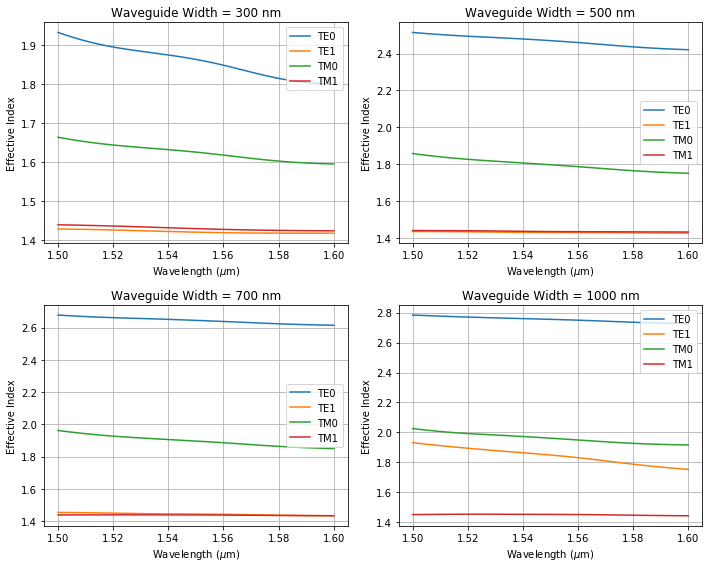

In [2]:
# All units are in microns
wavelength = np.linspace(1.5,1.6,100)
width      = np.array([0.3,0.5,0.7,1])
thickness  = 0.22
TE0,TE1,TE2,TM0,TM1,TM2 = SiP.straightWaveguide(wavelength,width,thickness)


# Iterate through all the waveguide widths
plt.figure(figsize=(10, 8))
for k in range(width.size):
    plt.subplot(2,2,k+1)
    plt.plot(wavelength,TE0[:,k,0],label='TE0')
    plt.plot(wavelength,TE1[:,k,0],label='TE1')
    plt.plot(wavelength,TM0[:,k,0],label='TM0')
    plt.plot(wavelength,TM1[:,k,0],label='TM1')
    plt.grid(True)
    plt.title("Waveguide Width = {0:.0f} nm".format(width[k]*1e3))
    plt.xlabel('Wavelength ($\mu$m)')
    plt.ylabel('Effective Index')
    plt.legend()
plt.tight_layout()
plt.show()

As expected, the smaller waveguides only support the first fundamental modes. As they grow larger, however, they start to support the second order modes.

Now, we can sweep the width, while holding the wavelength constant.

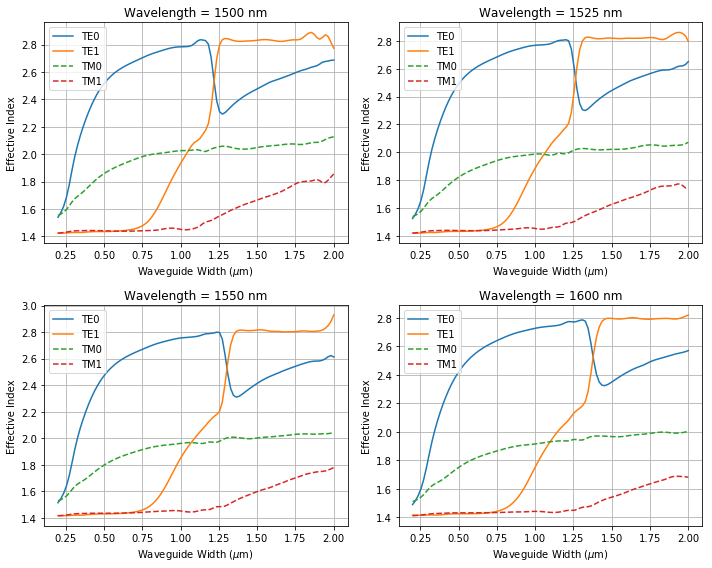

In [3]:
# All units are in microns
wavelength = np.array([1.5,1.525,1.55,1.6])
width      = np.linspace(0.2,2.0,100)
thickness  = 0.22

# This is the only function needed
TE0,TE1,TE2,TM0,TM1,TM2 = SiP.straightWaveguide(wavelength,width,thickness)
# The outputs are each multidimensional arrays to reflect each of the possible input parameters.

# Iterate through all the waveguide widths
plt.figure(figsize=(10, 8))
for k in range(wavelength.size):
    plt.subplot(2,2,k+1)
    plt.plot(width,TE0[k,:,0],label='TE0')
    plt.plot(width,TE1[k,:,0],label='TE1')
    plt.plot(width,TM0[k,:,0],'--',label='TM0')
    plt.plot(width,TM1[k,:,0],'--',label='TM1')
    plt.grid(True)
    plt.title("Wavelength = {0:.0f} nm".format(wavelength[k]*1e3))
    plt.xlabel('Waveguide Width ($\mu$m)')
    plt.ylabel('Effective Index')
    plt.legend()
plt.tight_layout()
plt.show()

Next, we can examine the group delay of the waveguides using the following relation:
$$n_g=n-\lambda_0\frac{dn}{d\lambda_0} $$
where $\lambda_0$ is the vacuum wavelength.

We can easily pull both $n$ and $\frac{dn}{d\lambda_0}$ from the neural network. In fact, the derivative term is analytic, avoiding any discretization.

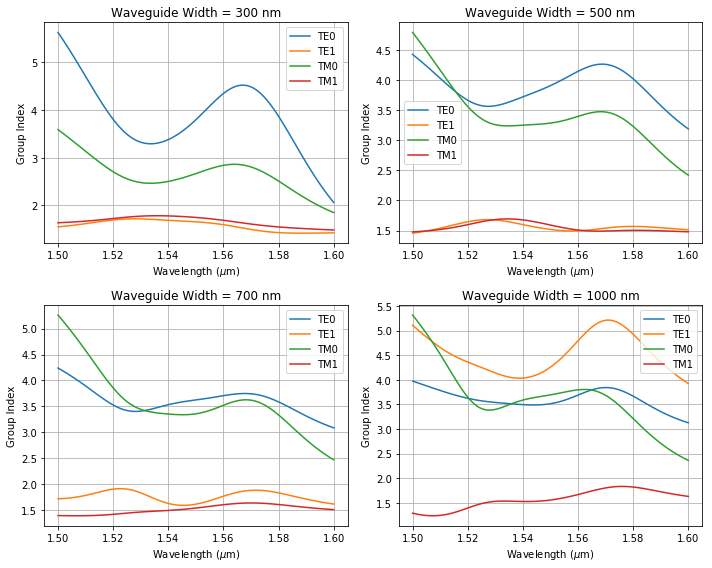

In [4]:
# All units are in microns
wavelength = np.linspace(1.5,1.6,100)
width      = np.array([0.3,0.5,0.7,1])
thickness  = 0.22
derivative = 1
TE0,TE1,TE2,TM0,TM1,TM2 = SiP.straightWaveguide(wavelength,width,thickness)
dTE0,dTE1,dTE2,dTM0,dTM1,dTM2 = SiP.straightWaveguide(wavelength,width,thickness,derivative)

ngTE0 = TE0 - wavelength * dTE0
ngTE1 = TE1 - wavelength * dTE1
ngTE2 = TE2 - wavelength * dTE2
ngTM0 = TM0 - wavelength * dTM0
ngTM1 = TM1 - wavelength * dTM1
ngTM2 = TM2 - wavelength * dTM2


# Iterate through all the waveguide widths
plt.figure(figsize=(10, 8))
for k in range(width.size):
    plt.subplot(2,2,k+1)
    plt.plot(wavelength,ngTE0[:,k,0],label='TE0')
    plt.plot(wavelength,ngTE1[:,k,0],label='TE1')
    plt.plot(wavelength,ngTM0[:,k,0],label='TM0')
    plt.plot(wavelength,ngTM1[:,k,0],label='TM1')
    plt.grid(True)
    plt.title("Waveguide Width = {0:.0f} nm".format(width[k]*1e3))
    plt.xlabel('Wavelength ($\mu$m)')
    plt.ylabel('Group Index')
    plt.legend()
plt.tight_layout()
plt.show()

## 2. Bent waveguides

We can also evaluate bent waveguides

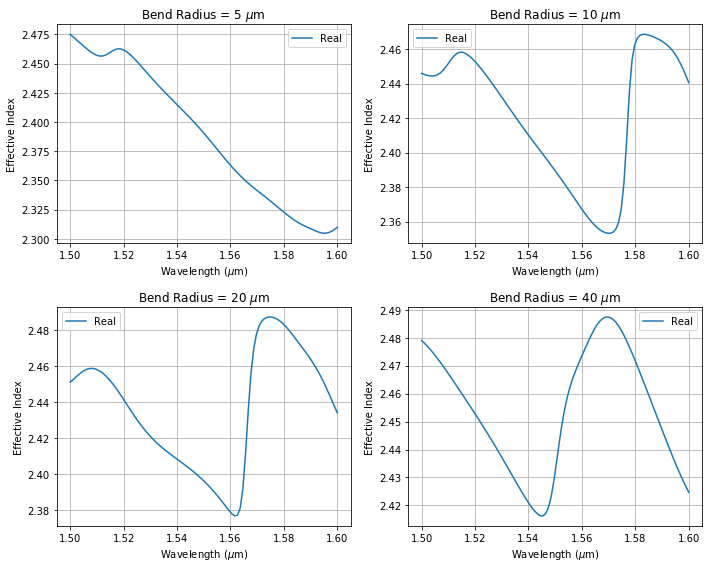

In [5]:
# All units are in microns
wavelength = np.linspace(1.5,1.6,100)
width      = 0.5
thickness  = 0.22
radius     = np.array([5,10,20,40])
TE0 = SiP.bentWaveguide(wavelength,width,thickness,radius)


# Iterate through all the waveguide widths
plt.figure(figsize=(10, 8))
for k in range(radius.size):
    plt.subplot(2,2,k+1)
    plt.plot(wavelength,np.real(TE0[:,0,0,k]),label='Real')
    #plt.plot(wavelength,TE1[:,0,0,k],label='Asymmetric')
    plt.grid(True)
    plt.title("Bend Radius = {0:.0f} $\mu$m".format(radius[k]))
    plt.xlabel('Wavelength ($\mu$m)')
    plt.ylabel('Effective Index')
    plt.legend()
plt.tight_layout()
plt.show()

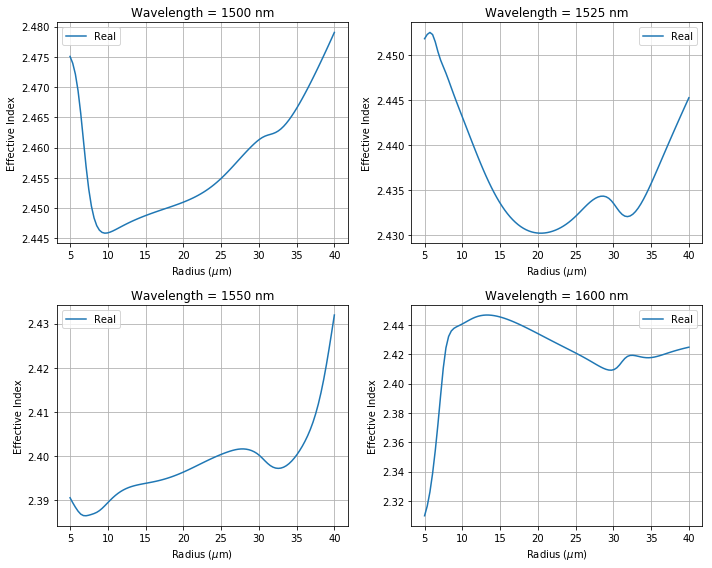

In [6]:
# All units are in microns
wavelength = np.array([1.5,1.525,1.55,1.6])
width      = 0.5
thickness  = 0.22
radius     = np.linspace(5,40,100)
TE0 = SiP.bentWaveguide(wavelength,width,thickness,radius)


# Iterate through all the waveguide widths
plt.figure(figsize=(10, 8))
for k in range(wavelength.size):
    plt.subplot(2,2,k+1)
    plt.plot(radius,np.real(TE0[k,0,0,:]),label='Real')
    #plt.plot(wavelength,TE1[:,0,0,k],label='Asymmetric')
    plt.grid(True)
    plt.title("Wavelength = {0:.0f} nm".format(wavelength[k]*1e3))
    plt.xlabel('Radius ($\mu$m)')
    plt.ylabel('Effective Index')
    plt.legend()
plt.tight_layout()
plt.show()

## 3. Evanescently Coupled Wavguides

Now we'll take a look at waveguides that act as evanescent waveguide couplers.

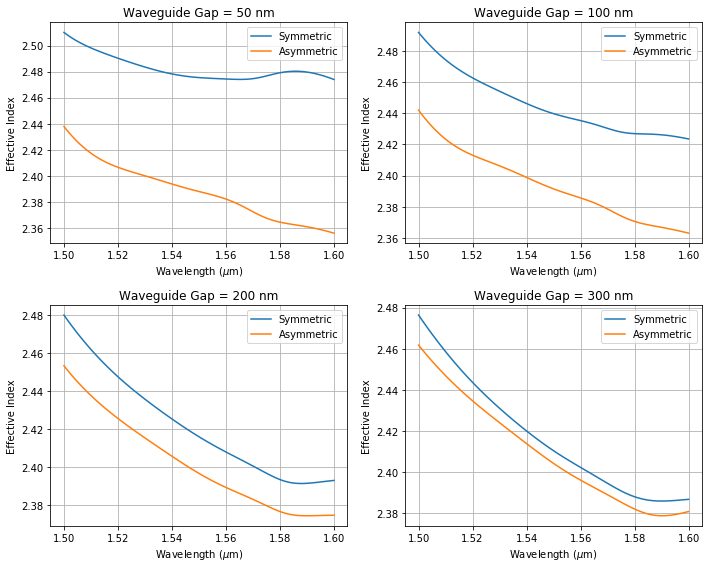

In [7]:
# All units are in microns
wavelength = np.linspace(1.5,1.6,100)
width      = 0.5
thickness  = 0.22
gap        = np.array([0.05,0.1,0.2,0.3])
derivative = 1
TE0,TE1 = SiP.evWGcoupler(wavelength,width,thickness,gap)


# Iterate through all the waveguide widths
plt.figure(figsize=(10, 8))
for k in range(gap.size):
    plt.subplot(2,2,k+1)
    plt.plot(wavelength,TE0[:,0,0,k],label='Symmetric')
    plt.plot(wavelength,TE1[:,0,0,k],label='Asymmetric')
    plt.grid(True)
    plt.title("Waveguide Gap = {0:.0f} nm".format(gap[k]*1e3))
    plt.xlabel('Wavelength ($\mu$m)')
    plt.ylabel('Effective Index')
    plt.legend()
plt.tight_layout()
plt.show()

We can also sweep across the gap at multiple wavelength points.

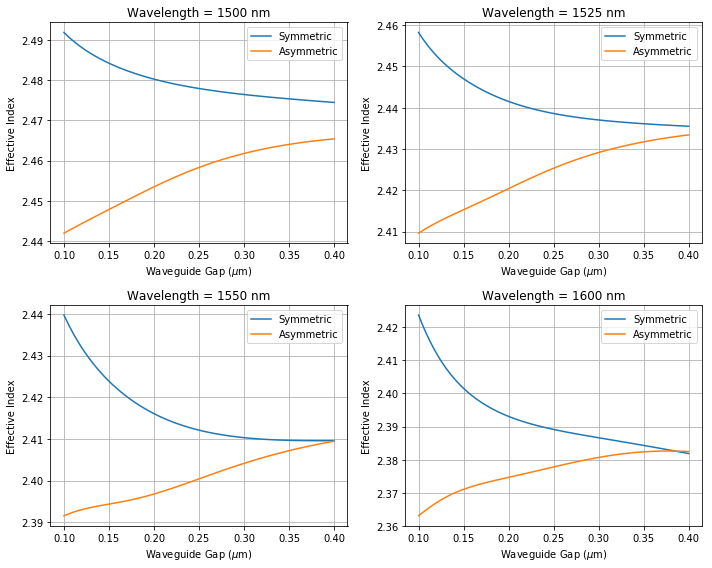

In [8]:
# All units are in microns
wavelength = np.array([1.5,1.525,1.55,1.6])
width      = 0.5
thickness  = 0.22
gap        = np.linspace(0.1,0.4,100)
derivative = 1
TE0,TE1 = SiP.evWGcoupler(wavelength,width,thickness,gap)

# Iterate through all the waveguide widths
plt.figure(figsize=(10, 8))
for k in range(wavelength.size):
    plt.subplot(2,2,k+1)
    plt.plot(gap,TE0[k,0,0,:],label='Symmetric')
    plt.plot(gap,TE1[k,0,0,:],label='Asymmetric')
    plt.grid(True)
    plt.title("Wavelength = {0:.0f} nm".format(wavelength[k]*1e3))
    plt.xlabel('Waveguide Gap ($\mu$m)')
    plt.ylabel('Effective Index')
    plt.legend()
plt.tight_layout()
plt.show()